In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from telco_pipeline import get_data_from_sql, peekatdata, split, df_value_counts, percent_missing, clean_data

### Acquire

In [2]:
df = get_data_from_sql()

### Clean

In [6]:
df.replace(to_replace=['No', 'Yes'], value=[True, False], inplace=True)
df.replace(to_replace=['No phone service'], value=[False], inplace=True)
df.replace(to_replace=['Female', 'Male'], value=[True, False], inplace=True)
df.replace(to_replace=['No internet service'], value=[False], inplace=True)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,1,0,0,0,9,1,...,0,0,1,0,59.9,542.4,0,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,0,0,0,1,9,1,...,1,1,1,1,69.4,571.45,0,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,0,1,0,0,7,1,...,0,0,0,1,48.2,340.35,0,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,1,1,0,0,1,0,...,0,0,0,1,25.1,25.1,1,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,0,0,1,1,1,0,...,0,0,0,0,30.5,30.5,1,Month-to-month,DSL,Bank transfer (automatic)


### Split

In [7]:
train, test = train_test_split(df)

### Explore - Heatmap

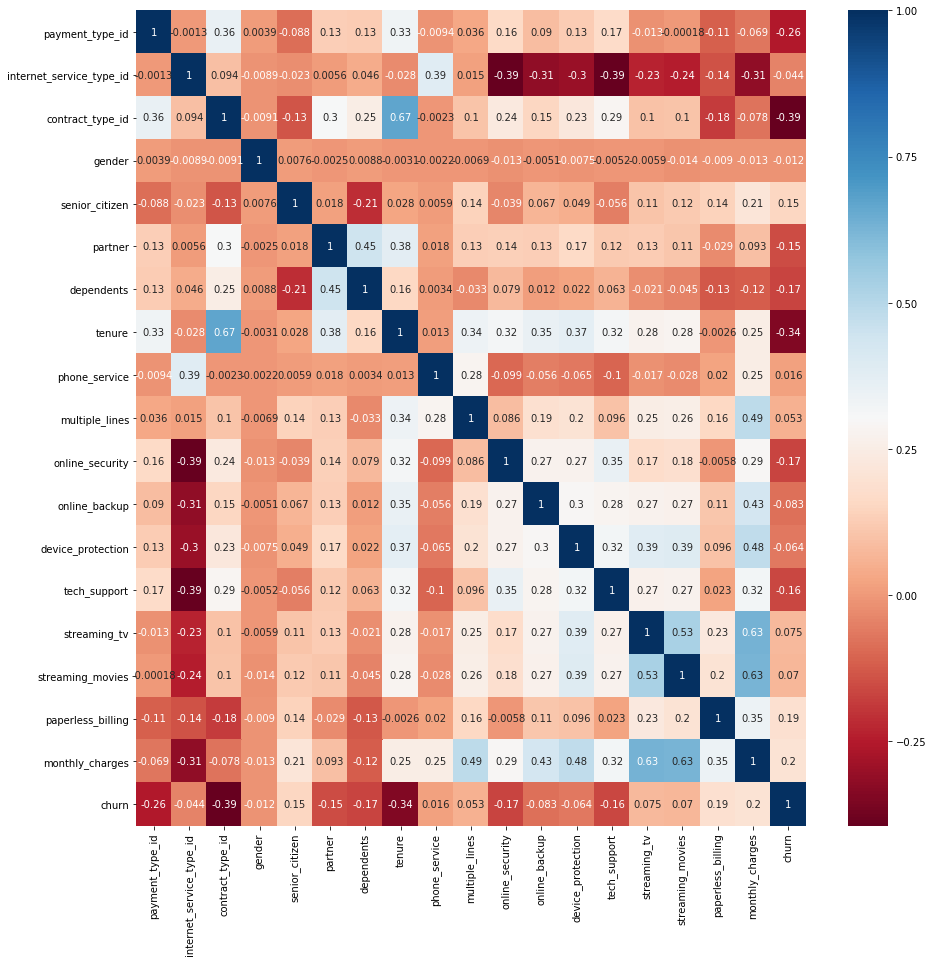

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), cmap='RdBu', annot=True)

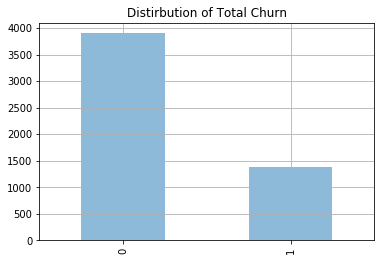

In [13]:
train.churn.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of Total Churn")
plt.grid(b = True , which = "major")

In [ ]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')